In [1]:
# Ignorar avisos
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importando bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc

In [3]:
# Carregando os dados
# Baixe o data frame em: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
caminho_dados = r'C:\Users\Matheus Fabiao\Desktop\TCC-IA-MERCADO-FINANCEIRO\data\creditcard.csv'
base_dados = pd.read_csv(caminho_dados)

In [4]:
# Faz uma cópia dos dados para manter a base original intacta
dados = base_dados.copy()

In [5]:
# Explorando os dados
dados.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Exibindo informações sobre o DataFrame
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Resumindo estatísticas descritivas do DataFrame
dados.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# Verificando se há valores nulos nos dados
dados.isnull().sum().any()

False

In [9]:
# #get correlations of each features in dataset
# corrmat = dados.corr()
# top_corr_features = corrmat.index
# plt.figure(figsize=(20,20))

# #plot heat map
# g=sns.heatmap(dados[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [10]:
# Removendo a coluna 'Time', por não ser relevante
dados = dados.drop(['Time'], axis=1)

In [11]:
# Separando as transações em fraude e não fraude
nao_fraudes = dados[dados['Class']==0]
print(f'O número de transações válidas é de {len(nao_fraudes)}')

O número de transações válidas é de 284315


In [12]:
# Separando as transações em fraude e não fraude
fraudes = dados[dados['Class']==1]
print(f'O número de transações fraudulentas é de {len(fraudes)}')

O número de transações fraudulentas é de 492


In [13]:
# Criando um conjunto de validação com 15 transações de cada classe
validacao_nao_fraudes = nao_fraudes.sample(15)
validacao_fraudes = fraudes.sample(15)

In [14]:
# Concatenando os dois conjuntos de validação
validacao = pd.concat([validacao_nao_fraudes, validacao_fraudes], ignore_index=True)

In [15]:
# Removendo as transações de validação do DataFrame original
dados = dados.drop(validacao_nao_fraudes.index)
dados = dados.drop(validacao_fraudes.index)

In [16]:
# Criando o DataFrame com os valores reais, para comparar com as previsões
validacao_real = validacao.Class

In [17]:
# Remover a coluna alvo 'Class'
validacao = validacao.drop(['Class'], axis=1)

In [18]:
# Verificação da contagem das classes
# Desequilíbrio entre a minoritária e majoritária
dados['Class'].value_counts()

Class
0    284300
1       477
Name: count, dtype: int64

In [19]:
# Separando os dados
x = dados.drop(['Class'], axis=1)
y = dados['Class']

In [20]:
# Importação da biblioteca de oversampling
from imblearn.over_sampling import SMOTE

# Utilização do SMOTE para a sobreamostragem
smote = SMOTE(random_state=42)
X_reamostrado, y_reamostrado = smote.fit_resample(x, y)

In [21]:
# Exibindo a contagem de rótulos após o SMOTE
# Equilíbrio entre a minoritária e majoritária
y_reamostrado.value_counts()

Class
0    284300
1    284300
Name: count, dtype: int64

In [22]:
# Dividindo os dados em conjuntos de treinamento e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(X_reamostrado, y_reamostrado, test_size=0.2, random_state=42)

In [23]:
# Treinando o modelo de Regressão Logística
modelo = LogisticRegression(max_iter=1000)
modelo.fit(x_treino, y_treino)

LogisticRegression(max_iter=1000)

In [24]:
# Realizando previsões com o modelo
previsao = modelo.predict(x_teste)

In [25]:
# Avaliando o modelo usando as principais métricas
precisao = precision_score(y_teste, previsao)
recall = recall_score(y_teste, previsao)
f1 = f1_score(y_teste, previsao)
acuracia = accuracy_score(y_teste, previsao)

In [26]:
# Exibindo as principais métricas
print(f'Precisão: {precisao:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'Acurácia: {acuracia:.2f}')

Precisão: 0.98
Recall: 0.94
F1-Score: 0.96
Acurácia: 0.96


In [27]:
# Matriz de Confusão (avaliação visual do desempenho do modelo)
confusion = confusion_matrix(y_teste, previsao)
print("Matriz de Confusão:")
print(confusion)

Matriz de Confusão:
[[55709   951]
 [ 3593 53467]]


In [28]:
# Classification Report (resumo das métricas de classificação)
print("Classification Report:")
print(classification_report(y_teste, previsao))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     56660
           1       0.98      0.94      0.96     57060

    accuracy                           0.96    113720
   macro avg       0.96      0.96      0.96    113720
weighted avg       0.96      0.96      0.96    113720

<class 'function'>


In [29]:
# Validação cruzada
pontuacoes_validacao_cruzada = cross_val_score(estimator=modelo, X=x_treino, y=y_treino, cv=5)
print("Média da Validação Cruzada:", pontuacoes_validacao_cruzada.mean())

Média da Validação Cruzada: 0.9602048892015477


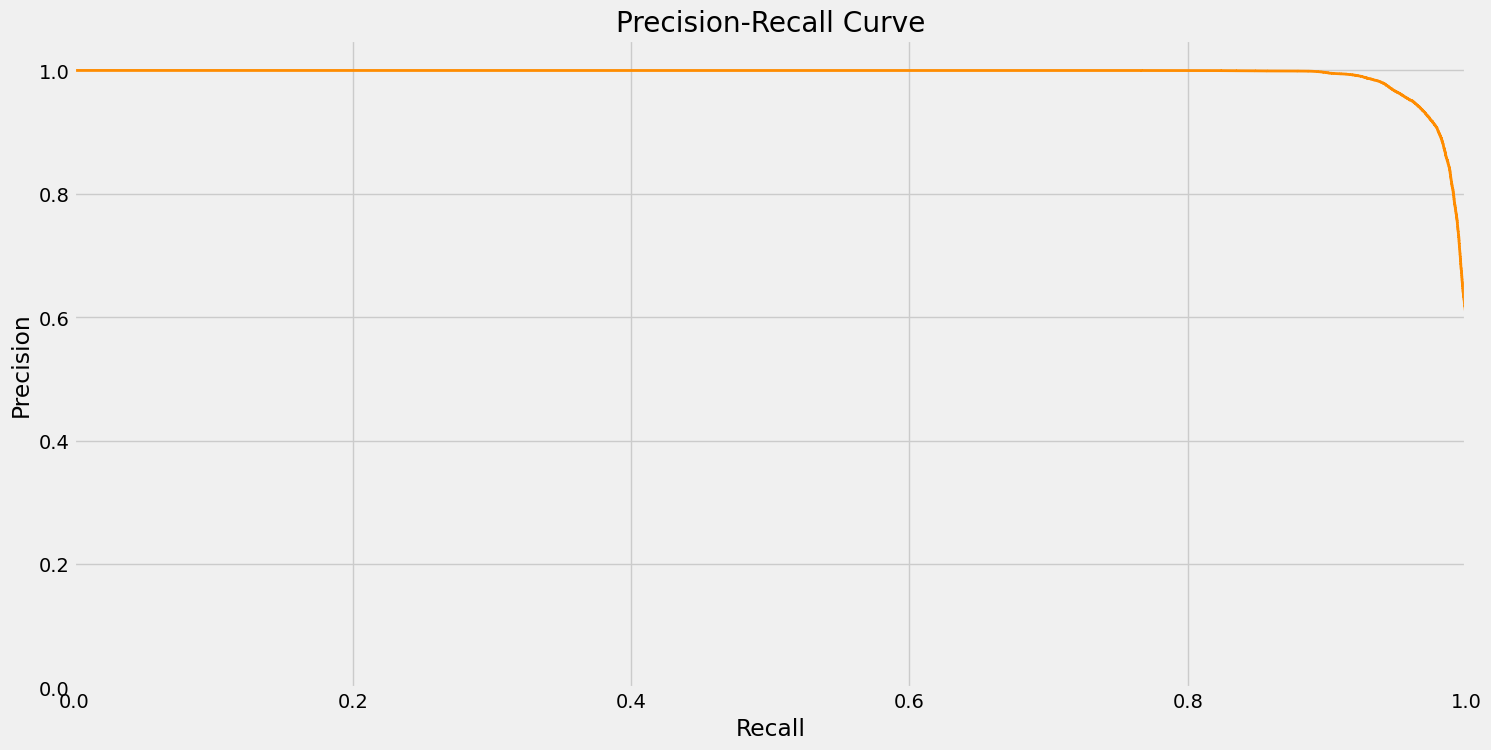

In [30]:
# Precision-Recall Curve (trade-off entre precisão e recall)
precision, recall, thresholds = precision_recall_curve(y_teste, modelo.predict_proba(x_teste)[:, 1])
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16, 8))
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

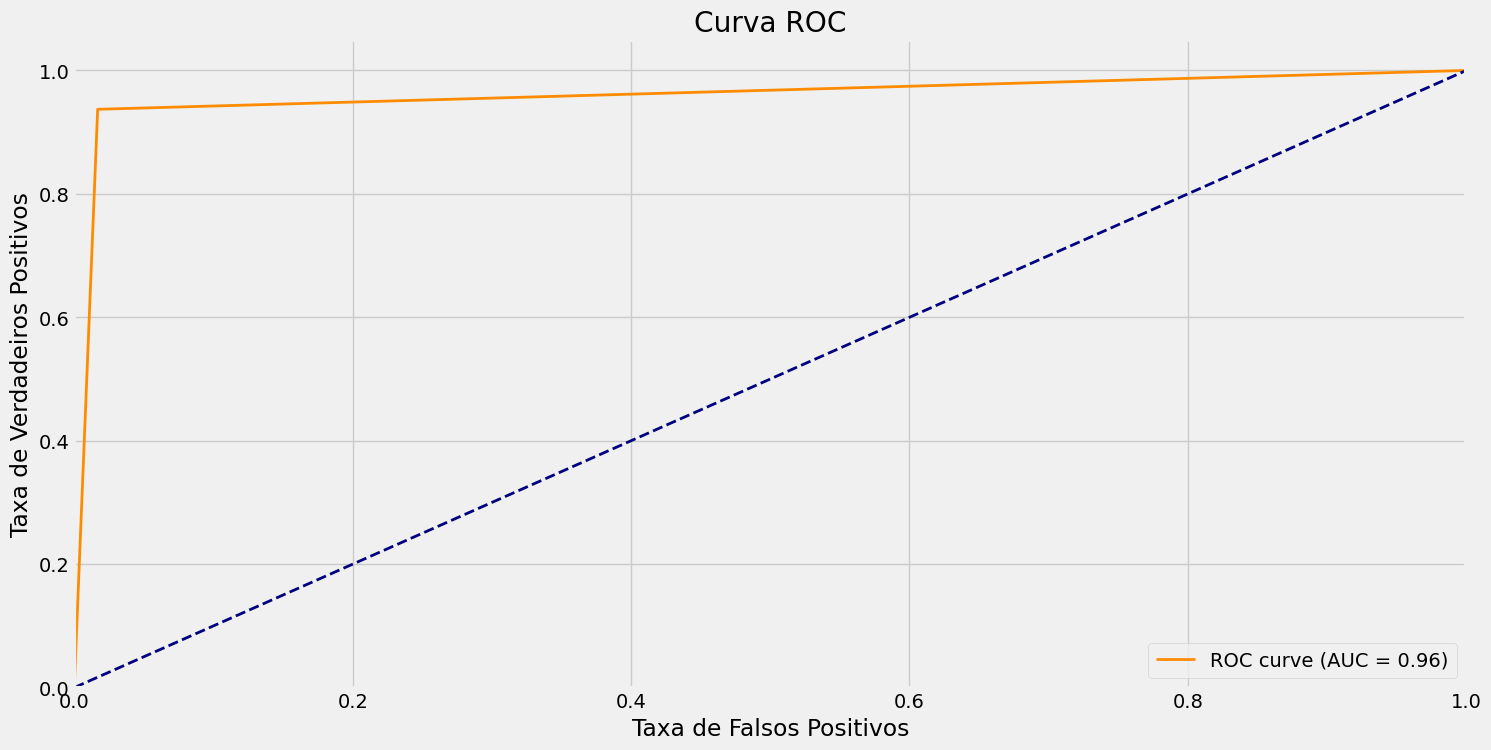

In [31]:
# Calculando a Curva ROC
fpr, tpr, thresholds = roc_curve(y_teste, previsao)
# Calculando a Área sob a Curva ROC (AUC)
roc_auc = auc(fpr, tpr)
# Plotando a Curva ROC
plt.figure(figsize=(16, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [32]:
# Fazendo previsões no conjunto de validação
predict = modelo.predict(validacao)

# Criando um DataFrame para comparar as classes reais com as previsões
dados = pd.DataFrame({'real':validacao_real, 'previsao':predict})

In [33]:
# Exibindo o DataFrame de comparação
dados

,real,previsao
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0
